# Data Wrangling Report

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assesing">Data Assesing and Cleaning</a></li>
<li><a href="#dva">Data Visualizing and analayzing</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Overview**: In this project we will be wrangling analyzing and visulizing the tweet archive of @dog_rates, also known as WeRateDogs.

We can get helpful and useful insights based on the information of archive tweets, that is will be done through different steps starting with gathering and extracting data ending up with the analysis and visualization.

In [1]:
#import libraries.

import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='intro'></a>
## 1. Data Gathering
In this step we will gather and extract data from different sources which are: tweets archive of @dog_rates and other .csv file, all given by Udacity, also data will be gathered through twitter API and jSON file.

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(link)

In [4]:
with open('image-predictions.tsv' , mode= 'wb') as file:
    file.write(response.content)
    image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
#creat API obj , so i can gather twitter data

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
#number of tweets ids
tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

In [7]:
#Opening JSON file to read line by line then storing data in data frame after appending them

listTweets = []
with open ('tweet_json.txt') as outfile:
    for i in outfile :
        Data = json.loads(i)
        listTweets.append({'tweet_id': Data['id'], 'retweet_count': Data['retweet_count'], 'favorite_count':Data['favorite_count']})
        
tweets_df = pd.DataFrame(listTweets, columns= ['tweet_id','retweet_count', 'favorite_count'])
tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assesing'></a>
## 2. Data Assesing and Cleaning
In this step, I will solve some problems occures from gathering the data from different sources such as problems in quality and tideness.

In [8]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None
258,843604394117681152,NaN,NaN,2017-03-19 23:25:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's been outside for 3 minutes ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843604394...,11,10,Hank,None,None,None,None
1323,706265994973601792,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Jack. He's one of the rare...,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
1373,701981390485725185,NaN,NaN,2016-02-23 04:06:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiji. She's a Powdered Stegafloof. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701981390...,12,10,Fiji,None,None,None,None


In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [13]:
tweets_df.sample(4)

,tweet_id,retweet_count,favorite_count
1072,739844404073074688,966,4138
2174,669203728096960512,522,1074
2206,668625577880875008,140,417
1960,673355879178194945,652,1606


## Quality
Twitter archive dataframe : 
- Change datatype of 'tweet_id' , 'in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id', 'retweeted_status_user_id' to String.
- Change 'timestamp' datatype to datetime.   
- Create 'rating' column that contains numertator rating divided by demonerator rating.
- Drop unimportant columns : expanded_url demonerator rating , numertator, name, doggo , floofer , pupper , and puppo 
- Simplify the url in 'source' column to make it more neat/clear and readable.
- Replace 'None' with 'NaN'.
- Deal with incorrect dogs name like: "a", "an", "such","the"..
- Remove retweeted tweets to identify only original tweets.
 
Image prediction dataframe : 
- Change 'tweet_id' datatype to String

Tweets dataframe : 
- Change 'id' datatype to String

## Tidiness
Twitter archive dataframe : 
- Merge the following columns: "doggo , floofer , pupper , and puppo" into one column "stage"

- Merge all dataframes together since their information are related


## Data cleaning

After assesing the data there is multiple things need to be cleaned based on tidiness and quality issues, so I divided each dataframe needed to be cleaned into two parts.

**1. Code**: shows the code of cleaning.

**2. Test**: shows and ensure the result of written code

## 1st : Twitter archive dataframe

For this dataframe, first i will copy into new dataframe so that I can make the cleaning process for the new version, then I will change datatypes into suitable ones, then I will merge doggo , floofer, pupper and puppo columns into one column named 'stage', after that, creating new 'rating' column that equals to numerator rating divided by dominator rating, then I will simplify 'source' column records/urls into neat and clear version and I'll will remove retweeted tweets to identify only original tweets. Finally, I will drop nulls and replace None with NaN.

### Code

In [14]:
cleaned_twitter_archive = archive.copy()

In [15]:
#Change Data type

cleaned_twitter_archive['tweet_id'] = cleaned_twitter_archive['tweet_id'].astype(str)
cleaned_twitter_archive['in_reply_to_status_id'] = cleaned_twitter_archive['in_reply_to_status_id'].astype(str)
cleaned_twitter_archive['in_reply_to_user_id'] = cleaned_twitter_archive['in_reply_to_user_id'].astype(str)
cleaned_twitter_archive['retweeted_status_id'] = cleaned_twitter_archive['retweeted_status_id'].astype(str)
cleaned_twitter_archive['retweeted_status_user_id'] = cleaned_twitter_archive['retweeted_status_user_id'].astype(str)
cleaned_twitter_archive['timestamp'] = pd.to_datetime(cleaned_twitter_archive['timestamp'])

### Test

In [16]:
cleaned_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Code

In [17]:
#Creat 'rating' column
cleaned_twitter_archive['rating'] = cleaned_twitter_archive['rating_numerator']/cleaned_twitter_archive['rating_denominator']

### Test

In [18]:
cleaned_twitter_archive['rating'].value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
1.500000        2
0.000000        2
7.500000        2
0.818182        2
1.250000        1
66.600000       1
inf             1
1.700000        1
3.428571        1
0.636364        1
2.700000        1
0.733333        1
2.600000        1
18.200000       1
177.600000      1
Name: rating, dtype: int64

### Code

In [19]:
#Change incorrect dog names.
cleaned_twitter_archive.name.sort_values()


1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [20]:
cleaned_twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [21]:
#Replace incorrect name with 'None'

cleaned_twitter_archive.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0', 'life', 'one', 'his', 'very'],'None')

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2356, dtype: object

### Test

In [22]:
cleaned_twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
General      1
Antony       1
Jim          1
Brudge       1
Pete         1
Name: name, Length: 957, dtype: int64

In [23]:
cleaned_twitter_archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
341,832215726631055365,nan,nan,2017-02-16 13:11:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932864763017994e+17,4196983835.0,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None,1.30
24,887343217045368832,nan,nan,2017-07-18 16:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,nan,nan,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None,1.30
1385,700747788515020802,nan,nan,2016-02-19 18:24:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,nan,nan,NaN,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None,1.10
2326,666411507551481857,nan,nan,2015-11-17 00:24:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,nan,nan,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None,0.20
1709,680609293079592961,nan,nan,2015-12-26 04:41:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. That is his chair. He loves his...,nan,nan,NaN,https://twitter.com/dog_rates/status/680609293...,9,10,Brody,None,None,None,None,0.90
233,847842811428974592,nan,nan,2017-03-31 16:07:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Rontu. He is described as a pal, cuddl...",nan,nan,NaN,"https://www.gofundme.com/help-save-rontu,https...",12,10,Rontu,None,None,None,None,1.20
694,786729988674449408,nan,nan,2016-10-14 00:47:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,7.594476815971082e+17,4196983835.0,2016-07-30 17:56:51 +0000,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None,1.10
1663,682808988178739200,6.827884415375606e+17,4196983835.0,2016-01-01 06:22:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",nan,nan,NaN,NaN,20,16,None,None,None,None,None,1.25
1505,691793053716221953,nan,nan,2016-01-26 01:21:31+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate penguins but this one is...,nan,nan,NaN,https://vine.co/v/OTTVAKw6YlW,10,10,None,None,None,None,None,1.00
1415,698703483621523456,nan,nan,2016-02-14 03:01:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He has no respect for POULTRY p...,nan,nan,NaN,https://twitter.com/dog_rates/status/698703483...,7,10,Rusty,None,None,None,None,0.70


### Code 

In [24]:
#Combine the types into 1 column and drop unnecessairly columns.

cleaned_twitter_archive['stage'] = cleaned_twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
cleaned_twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo' , 'expanded_urls' , 'name','rating_numerator' ,'rating_denominator','retweeted_status_user_id','retweeted_status_id'], axis=1, inplace=True)


### Test

In [25]:
cleaned_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_timestamp  181 non-null    object             
 7   rating                      2356 non-null   float64            
 8   stage                       2356 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(7)
memory usage: 165.8+ KB


### Code

In [26]:
#Change None to NaN.

cleaned_twitter_archive['stage'] = cleaned_twitter_archive['stage'].replace('None', np.NaN)

### Test

In [27]:
cleaned_twitter_archive.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,rating,stage
1313,706904523814649856,nan,nan,2016-03-07 18:09:06+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Ever seen a dog pet another dog? Both 13/10 tr...,NaN,1.3,NaN
514,811627233043480576,nan,nan,2016-12-21 17:39:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Augie. He's a savage. Doesn't give a h...,NaN,1.0,NaN
1090,737678689543020544,nan,nan,2016-05-31 16:14:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,1.1,NaN
1100,735648611367784448,nan,nan,2016-05-26 01:47:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*faints* 12/10 perfection in pupper form https...,NaN,1.2,pupper
1259,710272297844797440,nan,nan,2016-03-17 01:11:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,NaN,1.1,NaN
1501,692142790915014657,6.920419346894029e+17,4196983835.0,2016-01-27 00:31:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",These are some pictures of Teddy that further ...,NaN,1.3,NaN
379,827653905312006145,nan,nan,2017-02-03 23:04:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Boots. She doesn't know what to do wit...,NaN,1.2,NaN
380,827600520311402496,nan,nan,2017-02-03 19:31:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tucker. It's his birthday. He's pupset wi...,NaN,1.3,NaN


In [28]:
#Drop Nulls.
cleaned_twitter_archive.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,rating,stage
78,877611172832227328,nan,nan,2017-06-21 19:36:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,2017-06-19 17:14:49 +0000,1.4,pupper
97,873337748698140672,nan,nan,2017-06-10 00:35:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,2017-06-09 16:22:42 +0000,1.2,pupper
132,866816280283807744,nan,nan,2017-05-23 00:41:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,2017-05-22 00:28:40 +0000,1.3,pupper
137,866094527597207552,nan,nan,2017-05-21 00:53:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper before and afte...,2017-03-04 00:21:08 +0000,1.2,pupper
211,851953902622658560,nan,nan,2017-04-12 00:23:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,2017-02-08 17:00:26 +0000,1.3,doggo
222,849668094696017920,nan,nan,2017-04-05 17:00:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gidget. She's a spy pup...,2017-02-19 01:23:00 +0000,1.2,pupper
281,839290600511926273,nan,nan,2017-03-08 01:44:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,2017-03-08 01:41:24 +0000,1.0,pupper
359,829878982036299777,nan,nan,2017-02-10 02:25:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,2017-02-02 01:01:21 +0000,1.2,doggo
397,825120256414846976,nan,nan,2017-01-27 23:16:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,2017-01-27 17:04:02 +0000,1.2,puppo
425,821421320206483457,nan,nan,2017-01-17 18:17:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He just gradua...,2016-10-01 19:47:08 +0000,1.2,doggo


### Test

In [29]:
cleaned_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_timestamp  181 non-null    object             
 7   rating                      2356 non-null   float64            
 8   stage                       380 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(7)
memory usage: 165.8+ KB


### Code

In [30]:
#Remove HTML code in 'source' column

cleaned_twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [31]:
from bs4 import BeautifulSoup as bs

new_source = []
for line, row in cleaned_twitter_archive.iterrows():
    soup = bs(row.source)
    x = soup.find('a').contents[0]
    new_source.append(x)
    
cleaned_twitter_archive['source'] = new_source

### Test

In [32]:
pd.Series(new_source).value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
dtype: int64

In [33]:
cleaned_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,rating,stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,1.3,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,1.3,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,1.2,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,1.3,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,1.2,NaN


### Code

In [34]:
#Remove retweets tweets from 'text' column.
cleaned_twitter_archive[~cleaned_twitter_archive.text.str.contains("RT", na=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,rating,stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,1.3,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,1.3,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,1.2,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,1.3,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,1.2,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,0.5,NaN
2352,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,0.6,NaN
2353,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,0.9,NaN
2354,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,0.7,NaN


### Test

In [35]:
cleaned_twitter_archive['text'].value_counts()

This is Trigger. He was minding his own business on stair when he overheard someone say they don't like bacon. 11/10 https://t.co/yqohZK4CL0    1
This is Tyrus. He's a Speckled Centennial Ticonderoga. Terrified of floating red ball. Nifty bandana. 8/10 v petable https://t.co/HqM3YhCaaa    1
"Dammit hooman quit playin I jus wanna wheat thin" 11/10 https://t.co/yAASRDPJnQ                                                                1
This is Tucker. He's a Dasani Episcopalian. Good lord what a tongue. 12/10 would never let go of https://t.co/gHtW5cgyy7                        1
Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC    1
                                                                                                                                               ..
This is Louie. He's had a long day. Did a lot of pupper things. Also appears to be rather heckin pettable. 11/10 https://t.c

## 2nd: Image predictions dataframe
For this dataframe, first I will copy it into new variable, then I will change the datatype of tweet_id into string to unify the id type in all dataframes since we will merge them at the end.

### Code

In [36]:
cleaned_img_predictions = image_predictions.copy()

#Change data type
cleaned_img_predictions['tweet_id'] = cleaned_img_predictions['tweet_id'].astype(str)

### Test

In [37]:
cleaned_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [38]:
cleaned_img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3rd: Tweets dataframe
In this dataframe, first I repeated the copy step, then i change the datatype of tweet_id. 

### Code

In [39]:
cleaned_tweets= tweets_df.copy()

#Change datatype
cleaned_tweets['tweet_id'] = cleaned_tweets['tweet_id'].astype(str)

### Test

In [40]:
cleaned_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [41]:
cleaned_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 4th: Merge three dataframes.
In this step we merge the three datasets since, first I choose the important columns then I put the primary key of the three dataframes which is 'tweet_id' because it will allow me to merge correctly after that i stored the merged dataframe into 'twitter_archive_master.csv'.   

### Code

In [42]:
from functools import reduce
merge = [cleaned_twitter_archive, cleaned_img_predictions, cleaned_tweets]
twitter_df = reduce(lambda left , right: pd.merge(left,right,on='tweet_id'), merge)

### Test

In [43]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,rating,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [44]:
#Storing dataframe in .csv
twitter_df.to_csv('twitter_archive_master.csv')

<a id='dva'></a>
## 3. Data Visualization & Analysis
In this section, I extract knowledge and insights from the data by converting the data into information. First, I specified the 
columns to extract the insights from, which are: retweet count, favorite count,
stages, timestamp, and rating.

Text(0, 0.5, 'Count')

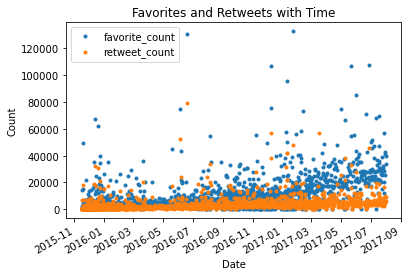

In [45]:
twitter_df = pd.read_csv('twitter_archive_master.csv')
twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'])
twitter_df.set_index('timestamp', inplace=True)

twitter_df[['favorite_count', 'retweet_count']].plot(style = '.')
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count')

From the above plot, we can find that all of the three features has positive relationship (it increases with time).
Most of the dots are very near to each other, so the favorite_count and retweet_count have strong positive correlation.

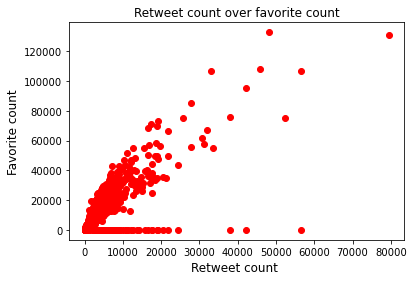

In [46]:
plt.scatter(twitter_df.retweet_count,twitter_df.favorite_count, color='red' )
plt.xlabel("Retweet count ", fontsize=12)
plt.ylabel("Favorite count", fontsize=12)
plt.title("Retweet count over favorite count",fontsize=12)
plt.show()

We can find from above plot that when users retweet a tweet favorite this tweet.
Also there is overlap between (0,0) to (15000,5000).

Text(0, 0.5, 'Favorite Count')

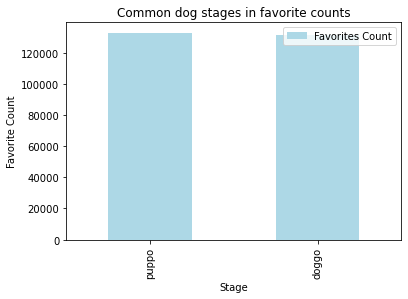

In [47]:
#Take top 2 favorits after sorting it.
sortF = twitter_df['favorite_count'].sort_values(ascending=False)[:2]

#create lists
stage=[]
favorite=[]

#create new df
new =pd.DataFrame()

#loop goes through 'cleaned_tweets' dataframe, pick only required info and fill the list with it.
for i in sortF.index:
    stage.append(twitter_df.loc[i,'stage'])
    favorite.append(sortF.loc[i])
    
    #assign the lists to the new df
new['Stage']=stage
new['Favorites Count']=favorite
new.set_index('Stage',inplace=True)
new.plot(kind ='bar',color='lightblue') 
plt.title('Common dog stages in favorite counts')
plt.ylabel('Favorite Count')

From above plot, we can figure that Puppo and Duggo are the two most common dog stages based on favorite counts

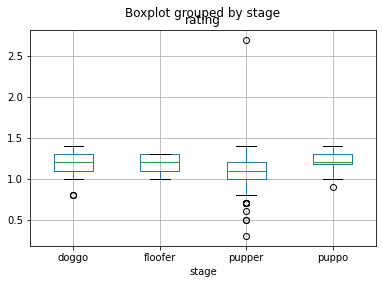

In [48]:
twitter_df.boxplot(column='rating', by='stage')

The boxplot above shows the ratings and dogs stages, and we can find that 'puppers' gets lowest rating comparing to other digs, also thier is many outliers that affects its mean negatively.

In [49]:
highest_favorite_count = twitter_df.sort_values(by=['favorite_count'], ascending=False)
highest_favorite_count.iloc[0:10, [ 1, -4]]

,tweet_id,p3_conf
timestamp,,
2017-01-21 18:26:02+00:00,822872901745569793,0.069126
2016-06-18 18:26:18+00:00,744234799360020481,0.018442
2017-06-26 19:07:24+00:00,879415818425184262,0.110481
2016-12-09 06:17:20+00:00,807106840509214720,0.077008
2017-05-22 00:28:40+00:00,866450705531457537,0.001771
2017-01-11 02:15:36+00:00,819004803107983360,0.094759
2017-06-01 20:18:38+00:00,870374049280663552,0.032621
2016-12-07 22:38:52+00:00,806629075125202948,0.046403
2017-05-02 00:04:57+00:00,859196978902773760,0.128383


In [50]:
twitter_df[['favorite_count', 'rating', 'retweet_count']].corr(method='pearson')

,favorite_count,rating,retweet_count
favorite_count,1.000000,0.015592,0.790476
rating,0.015592,1.000000,0.017448
retweet_count,0.790476,0.017448,1.000000


In [51]:
twitter_df.groupby('stage')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,67.0,1.197015,0.147679,0.8,1.100,1.2,1.3,1.4
floofer,8.0,1.187500,0.112599,1.0,1.100,1.2,1.3,1.3
pupper,221.0,1.077376,0.206781,0.3,1.000,1.1,1.2,2.7
puppo,24.0,1.204167,0.126763,0.9,1.175,1.2,1.3,1.4


Puppers gets lowest rates comparing to other dog types because they dont have much outliers that affect the mean.